# Classificação dos Captchas

In [1]:
import io
import os
import tempfile
import time

In [2]:
from IPython import display
from IPython.display import Audio, Image
import sqlite3

In [3]:
from database import Database
from splitaudio import solve_captcha

In [4]:
def validate(solution):
    ''' Valida a resposta a um captcha '''
    return solution.isalnum() and len(solution) == 6

In [5]:
def salva_letra(letra, audio):   
    global PROJECT
    ''' Salva o áudio de uma letra na respectiva pasta da letra'''
    last_file = 0
    path = f'{PROJECT}/letras/{letra}/'
    files = os.listdir(path)
    if files:        
        last_file = int(sorted(files)[-1].split('.')[0])
    
    n = str(last_file + 1)
    
    filename = n.zfill(3) + '.wav'
    path = os.path.join(path, filename)
    
    with open(path, 'wb') as f:
        f.write(audio)
    print(f'Letra salva em {path}')

In [6]:
db = Database()

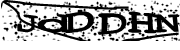

In [ ]:
PROJECT = os.getcwd()
for rowid, image, audio, *_ in list(db.get_captchas(solution=False)):
    print(rowid)
    Audio(audio, autoplay=True)
    with tempfile.TemporaryDirectory() as tmp_dir:
        os.chdir(tmp_dir)
        audios_letras = solve_captcha(io.BytesIO(audio), tmp_dir)
        if not audios_letras:            
            db.delete_captcha(rowid)        
        else:
            solution_text = ''
            display.clear_output()
            display.display(Image(image))            
            display.display(Audio(audio, autoplay=True))
            time.sleep(4)
            while not validate(solution_text):
                solution_text = input('Solução do captcha:').lower()
            db.insert_solution(rowid, solution_text)
            letras = list(solution_text)
            for audio, letra in zip(audios_letras[1], letras):
                salva_letra(letra, audio)            

In [ ]:

from IPython.display import *
Audio(captcha, autoplay=True)

In [ ]:
captcha = db.get_captcha(201).fetchone()[2]
with tempfile.TemporaryDirectory() as tmp_dir:
    os.chdir(tmp_dir)
    solve_captcha(io.BytesIO(captcha), temp_dir=tmp_dir, clean=False)
    for i in os.listdir():
        print(os.path.abspath(i))
    

In [24]:
rowid, image, audio, *_ = db.get_captcha(201).fetchone()

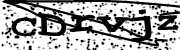

In [24]:
display.Image(image)

In [6]:
captcha = db.get_captcha(201).fetchone()[2]
with tempfile.TemporaryDirectory() as tmp_dir:
    os.chdir(tmp_dir)
    a = solve_captcha(io.BytesIO(captcha), temp_dir=tmp_dir, clean=False)

    Resultado: 0.125 13.2 SOLVED!


In [7]:
a

((0.125, 13.2),
  <_io.BytesIO at 0x7f16307f95c8>])

In [27]:
from IPython.display import *
Audio(a[1][4].getvalue(), autoplay=True)